In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk 
import string

In [6]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
df = pd.read_excel(r"C:\Users\vaish\OneDrive\Desktop\Projects\spam_detection\spam_ham_sms_dataset(1).xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\vaish\\OneDrive\\Desktop\\Projects\\spam_detection\\spam_ham_sms_dataset(1).xlsx'

In [ ]:
df.head()

,message_id,sender,message,timestamp,is_spam,category
0,1,AD-JIO-125,Congratulations! You've won a lottery. Click h...,2023-01-01 00:00:00,0.0,Promotional
1,2,AD-BANK-350,You have a new voicemail. Check now.,2023-01-01 01:00:00,0.0,Promotional
2,3,AD-WINZO-242,Congratulations! You've won a lottery. Click h...,2023-01-01 02:00:00,0.0,Promotional
3,4,AD-JIO-792,You have a new voicemail. Check now.,2023-01-01 03:00:00,1.0,Promotional
4,5,AD-INFO-189,Don't forget mom's birthday this Friday.,2023-01-01 04:00:00,1.0,Transactional


In [ ]:
df.isnull().sum()

message_id    0
sender        0
message       1
timestamp     0
is_spam       1
category      0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   message_id  998 non-null    int64         
 1   sender      998 non-null    object        
 2   message     998 non-null    object        
 3   timestamp   998 non-null    datetime64[ns]
 4   is_spam     998 non-null    float64       
 5   category    998 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 54.6+ KB


In [ ]:
df.duplicated().sum()
df = df.drop_duplicates()

In [ ]:
df.head()

,message_id,sender,message,timestamp,is_spam,category
0,1,AD-JIO-125,Congratulations! You've won a lottery. Click h...,2023-01-01 00:00:00,0.0,Promotional
1,2,AD-BANK-350,You have a new voicemail. Check now.,2023-01-01 01:00:00,0.0,Promotional
2,3,AD-WINZO-242,Congratulations! You've won a lottery. Click h...,2023-01-01 02:00:00,0.0,Promotional
3,4,AD-JIO-792,You have a new voicemail. Check now.,2023-01-01 03:00:00,1.0,Promotional
4,5,AD-INFO-189,Don't forget mom's birthday this Friday.,2023-01-01 04:00:00,1.0,Transactional


In [ ]:
df.shape

(998, 6)

In [ ]:
df = df.drop(['message_id'], axis=1)

In [ ]:
df = df.drop(['timestamp'], axis=1)

In [ ]:
df = df.drop(['sender'], axis=1)

In [ ]:
df.head(20)

,message,is_spam,category
0,Congratulations! You've won a lottery. Click h...,0.0,Promotional
1,You have a new voicemail. Check now.,0.0,Promotional
2,Congratulations! You've won a lottery. Click h...,0.0,Promotional
3,You have a new voicemail. Check now.,1.0,Promotional
4,Don't forget mom's birthday this Friday.,1.0,Transactional
5,Meeting scheduled at 3 PM tomorrow.,0.0,Promotional
6,"Hello, let's meet at 5 PM near the cafe.",0.0,Transactional
7,You have a new voicemail. Check now.,0.0,Personal
8,Reminder: Your EMI is due. Pay now to avoid pe...,1.0,Promotional
9,Meeting scheduled at 3 PM tomorrow.,1.0,Transactional


In [ ]:
df['is_spam'].value_counts()

is_spam
0.0    511
1.0    487
Name: count, dtype: int64

In [ ]:
df.message

0      Congratulations! You've won a lottery. Click h...
1                   You have a new voicemail. Check now.
2      Congratulations! You've won a lottery. Click h...
3                   You have a new voicemail. Check now.
4               Don't forget mom's birthday this Friday.
                             ...                        
995    Congratulations! You've won a lottery. Click h...
996    Reminder: Your EMI is due. Pay now to avoid pe...
997         Free recharge on downloading our app. Hurry!
998             Don't forget mom's birthday this Friday.
999    Limited time loan offer. Get 竄ｹ2,00,000 approv...
Name: message, Length: 998, dtype: object

In [ ]:
df['message'] = df['message'].str.replace('竄ｹ', '')
df['message'] = df['message'].str.lower()

In [ ]:
df.head(20)

,message,is_spam,category
0,congratulations! you've won a lottery. click h...,0.0,Promotional
1,you have a new voicemail. check now.,0.0,Promotional
2,congratulations! you've won a lottery. click h...,0.0,Promotional
3,you have a new voicemail. check now.,1.0,Promotional
4,don't forget mom's birthday this friday.,1.0,Transactional
5,meeting scheduled at 3 pm tomorrow.,0.0,Promotional
6,"hello, let's meet at 5 pm near the cafe.",0.0,Transactional
7,you have a new voicemail. check now.,0.0,Personal
8,reminder: your emi is due. pay now to avoid pe...,1.0,Promotional
9,meeting scheduled at 3 pm tomorrow.,1.0,Transactional


In [ ]:
# EDA

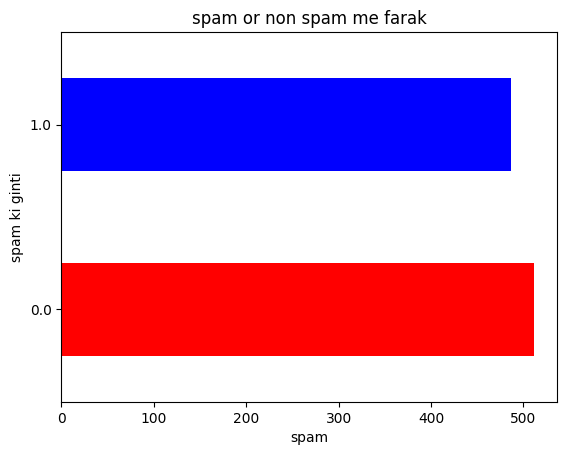

In [ ]:
df['is_spam'].value_counts().plot(kind='barh', color=['red', 'blue'])
plt.title('spam or non spam me farak')
plt.xlabel('spam')
plt.ylabel('spam ki ginti')
plt.show()

In [ ]:
df['is_spam'].value_counts()


is_spam
0.0    511
1.0    487
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x224a37623c0>,
 [Text(-0.041542317024623424, 1.0992152818698555, 'ham'),
  Text(0.04154215104773308, -1.0992152881425583, 'spam')],
 [Text(-0.02265944564979459, 0.599571971929012, '51.2%'),
  Text(0.022659355116945317, -0.5995719753504862, '48.8%')])

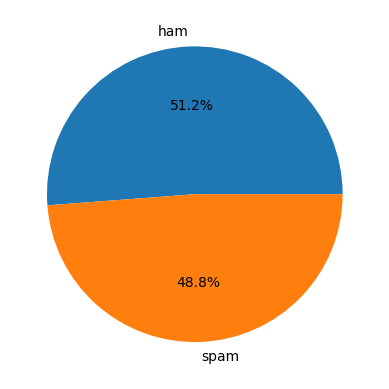

In [ ]:
plt.pie(df['is_spam'].value_counts(),labels=['ham', 'spam'],autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x224a6aedf90>,
 [Text(0.4345098312071893, 1.0105450047297746, 'promotional'),
  Text(-1.0804380227940538, -0.20652767102951608, 'transactional'),
  Text(0.616515142069045, -0.9109934574954891, 'personal')],
 [Text(0.23700536247664866, 0.5512063662162406, '37.1%'),
  Text(-0.5893298306149383, -0.11265145692519057, '31.9%'),
  Text(0.3362809865831154, -0.49690552227026674, '31.1%')])

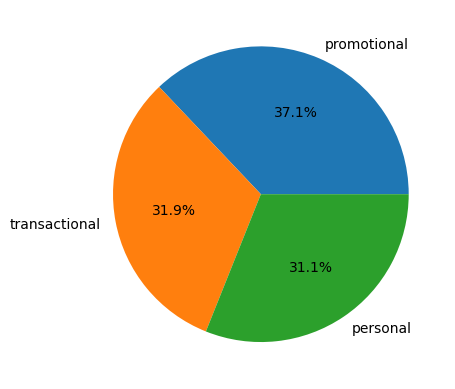

In [ ]:
plt.pie(df['category'].value_counts(), labels=['promotional', 'transactional', 'personal'],autopct='%1.1f%%')

In [ ]:
# lengtrh nikale char ka
df['msg_char'] = df['message'].apply(len)
df.head()

,message,is_spam,category,msg_char
0,congratulations! you've won a lottery. click h...,0.0,Promotional,63
1,you have a new voicemail. check now.,0.0,Promotional,36
2,congratulations! you've won a lottery. click h...,0.0,Promotional,63
3,you have a new voicemail. check now.,1.0,Promotional,36
4,don't forget mom's birthday this friday.,1.0,Transactional,40


In [ ]:
# word tokenize kre msg columns ka
df['msg_word'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,message,is_spam,category,msg_char,msg_word
0,congratulations! you've won a lottery. click h...,0.0,Promotional,63,14
1,you have a new voicemail. check now.,0.0,Promotional,36,9
2,congratulations! you've won a lottery. click h...,0.0,Promotional,63,14
3,you have a new voicemail. check now.,1.0,Promotional,36,9
4,don't forget mom's birthday this friday.,1.0,Transactional,40,9


In [ ]:

df['sent_tok'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(10)

,message,is_spam,category,msg_char,msg_word,sent_tok
800,"win 1,00,000 by playing ludo. join now!",0.0,Promotional,39,9,2
364,congratulations! you've won a lottery. click h...,1.0,Personal,63,14,3
221,free recharge on downloading our app. hurry!,1.0,Personal,44,9,2
217,reminder: your emi is due. pay now to avoid pe...,0.0,Promotional,52,13,2
350,you have a new voicemail. check now.,0.0,Promotional,36,9,2
375,free recharge on downloading our app. hurry!,1.0,Promotional,44,9,2
70,don't forget mom's birthday this friday.,1.0,Transactional,40,9,1
876,"win 1,00,000 by playing ludo. join now!",0.0,Promotional,39,9,2
356,"hello, let's meet at 5 pm near the cafe.",1.0,Transactional,40,12,1
399,you have a new voicemail. check now.,0.0,Transactional,36,9,2


In [ ]:
df[['msg_word', 'msg_char', 'sent_tok']].describe()

,msg_word,msg_char,sent_tok
count,998.000000,998.000000,998.000000
mean,10.207415,44.466934,1.774549
std,2.047105,8.359789,0.611060
min,7.000000,35.000000,1.000000
25%,9.000000,39.000000,1.000000
50%,9.000000,40.000000,2.000000
75%,12.000000,52.000000,2.000000
max,14.000000,63.000000,3.000000


In [ ]:
df[df['is_spam']==0][['msg_word', 'msg_char', 'sent_tok']].describe()

,msg_word,msg_char,sent_tok
count,511.000000,511.000000,511.000000
mean,10.146771,44.399217,1.772994
std,2.064638,8.543150,0.628829
min,7.000000,35.000000,1.000000
25%,9.000000,39.000000,1.000000
50%,9.000000,40.000000,2.000000
75%,12.000000,52.000000,2.000000
max,14.000000,63.000000,3.000000


In [ ]:
df[df['is_spam'] == 1][['msg_word', 'msg_char', 'sent_tok']].describe()

,msg_word,msg_char,sent_tok
count,487.000000,487.000000,487.000000
mean,10.271047,44.537988,1.776181
std,2.028715,8.171144,0.592483
min,7.000000,35.000000,1.000000
25%,9.000000,39.000000,1.000000
50%,9.000000,40.000000,2.000000
75%,12.000000,52.000000,2.000000
max,14.000000,63.000000,3.000000


In [ ]:
df[df['is_spam'] == 1][['msg_word', 'msg_char', 'sent_tok']].describe()

,msg_word,msg_char,sent_tok
count,487.000000,487.000000,487.000000
mean,10.271047,44.537988,1.776181
std,2.028715,8.171144,0.592483
min,7.000000,35.000000,1.000000
25%,9.000000,39.000000,1.000000
50%,9.000000,40.000000,2.000000
75%,12.000000,52.000000,2.000000
max,14.000000,63.000000,3.000000


In [ ]:
df['category'].describe()

count          998
unique           3
top       Personal
freq           370
Name: category, dtype: object

In [ ]:
category = pd.get_dummies(df,columns=['category'],dtype=int)

In [ ]:
category.sample()

,message,is_spam,msg_char,msg_word,sent_tok,category_Personal,category_Promotional,category_Transactional
521,reminder: your emi is due. pay now to avoid pe...,0.0,52,13,2,1,0,0


In [ ]:
newdf = category

In [ ]:
newdf

,message,is_spam,msg_char,msg_word,sent_tok,category_Personal,category_Promotional,category_Transactional
0,congratulations! you've won a lottery. click h...,0.0,63,14,3,0,1,0
1,you have a new voicemail. check now.,0.0,36,9,2,0,1,0
2,congratulations! you've won a lottery. click h...,0.0,63,14,3,0,1,0
3,you have a new voicemail. check now.,1.0,36,9,2,0,1,0
4,don't forget mom's birthday this friday.,1.0,40,9,1,0,0,1
...,...,...,...,...,...,...,...,...
995,congratulations! you've won a lottery. click h...,1.0,63,14,3,0,1,0
996,reminder: your emi is due. pay now to avoid pe...,1.0,52,13,2,0,1,0
997,free recharge on downloading our app. hurry!,0.0,44,9,2,0,0,1
998,don't forget mom's birthday this friday.,0.0,40,9,1,0,0,1


In [ ]:
numdf = newdf.drop('message',axis=1)

In [ ]:
numdf

,is_spam,msg_char,msg_word,sent_tok,category_Personal,category_Promotional,category_Transactional
0,0.0,63,14,3,0,1,0
1,0.0,36,9,2,0,1,0
2,0.0,63,14,3,0,1,0
3,1.0,36,9,2,0,1,0
4,1.0,40,9,1,0,0,1
...,...,...,...,...,...,...,...
995,1.0,63,14,3,0,1,0
996,1.0,52,13,2,0,1,0
997,0.0,44,9,2,0,0,1
998,0.0,40,9,1,0,0,1


In [ ]:
# the use of HEATMAP 

<Axes: >

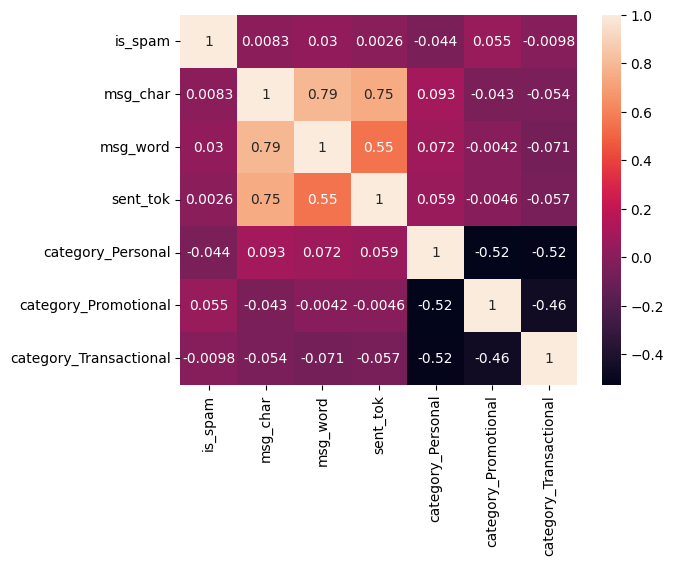

In [ ]:
sns.heatmap(numdf.corr(),annot=True)

 # DATA PREPROCESSING

In [ ]:
# Lower casee 
a = "HeLlp World"
a.lower()

'hellp world'

In [ ]:
from nltk import word_tokenize
from nltk.corpus import stopwords
b = "hello hi b?aby@/ guys * msg && ssmv jdhjhsgd shdghsgd dhshdhds"
abc = []


abcd = word_tokenize(b)
abcd
abcd2 = []
for i in abcd:
    if i not in stopwords.words('english') and i not in string.punctuation:
        abcd2.append(i)

abcd2


['hello',
 'hi',
 'b',
 'aby',
 'guys',
 'msg',
 'ssmv',
 'jdhjhsgd',
 'shdghsgd',
 'dhshdhds']

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.corpus import stopwords

stopwords.words('english')


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

# Example usage
b = "hello hi b?aby@/ guys * msg && ssmv jdjhjsgd shdhgsgd dhshdhds"
cleaned_tokens = transform_text(b)
print(cleaned_tokens)


NameError: name 'nltk' is not defined

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)